In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

from utils import load_dataset, train_test_split, get_weight

%matplotlib inline

# plt.rcParams['figure.figsize'] = [10, 6]
# plt.rcParams['figure.dpi'] = 200

In [2]:
dataset_path = 'dataset_LP_1.txt' 
# dataset_path = 'dataset_LP_2.csv'

X, y = load_dataset(dataset_path)

In [3]:
X.shape, y.shape

((1372, 5), (1372,))

In [4]:
training, testing = train_test_split(X, y)

In [5]:
training["X"].shape, training["y"].shape, testing["X"].shape, testing["y"].shape

((960, 5), (960,), (412, 5), (412,))

In [6]:
class Perceptron:
    def __init__(self, num_features, initialization='Random') -> None:
        self.w = get_weight((num_features, 1, initialization))
        self.iterations = 0

    def classify(self, X):
        y = X @ self.w
        y[y > 0] = 1
        y[y < 0] = -1

        return y

    def get_misclassified(self, X, y):
        y_hat = self.classify(X).squeeze()

        mask = y != y_hat

        return X[mask], y[mask]

In [7]:
class Perceptron(Perceptron):
    def fit(self, X, y, learning_rate=1, epochs=5, print_freq=1):

        accuracy = []

        for i in tqdm(range(epochs)):
            misclassified_X, misclassified_y = self.get_misclassified(X, y)

            acc = 1 - misclassified_X.shape[0] / X.shape[0]
            accuracy.append(acc)

            self.iterations += misclassified_X.shape[0]

            if (self.iterations > MAX_ITERATIONS):
                diff = self.iterations - MAX_ITERATIONS

                misclassified_X = misclassified_X[:-diff]
                misclassified_y = misclassified_y[:-diff]

            if acc == 1:
                return accuracy

            if print_freq and i % print_freq == 0:
                print(f"Accuracy at Iteration[{i}]: {acc}")

            self.w += learning_rate * \
                (misclassified_X * misclassified_y.reshape(-1, 1)
                 ).sum(axis=0).T.reshape(-1, 1)

            if (self.iterations > MAX_ITERATIONS):
                self.iterations -= (self.iterations - MAX_ITERATIONS)
                break

        print(f"Trained for {self.iterations} iterations")
        return accuracy

In [10]:
class Perceptron(Perceptron):
    def sgd(self, X, y, learning_rate=1, iterations=1000000, print_freq=0):

        accuracy = []
        for i in tqdm(range(iterations)):
            misclassified_X, misclassified_y = self.get_misclassified(X, y)

            acc = 1 - misclassified_X.shape[0] / X.shape[0]
            accuracy.append(acc)

            if acc == 1:
                return accuracy

            if print_freq and i % print_freq == 0:
                print(f"Accuracy at Iteration[{i}]: {acc}")

            idx = random.randrange(0, misclassified_X.shape[0])
            self.w += (learning_rate * 
                    misclassified_X[idx] * misclassified_y[idx]).reshape(-1, 1)

        self.iterations = iterations

        print(f"Trained for {self.iterations} iterations")
        return accuracy

100%|██████████| 1000000/1000000 [00:31<00:00, 32102.40it/s]Trained for 1000000 iterations



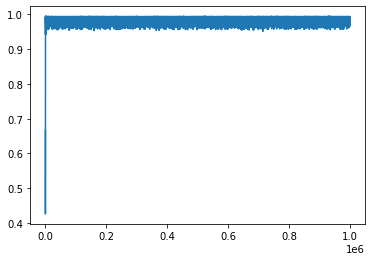

In [11]:
perceptron = Perceptron(X.shape[1])
accuraccy = perceptron.sgd(training["X"], training["y"])
plt.plot(accuraccy)